## FINAL PROJECT

### TELCO CHURN PREDICTION
#### SECTION 2 - MACHINE LEARNING MODEL BUILDING

***The goal of this section is to build and selecting the best model to predict the churned or not churned customers in order to help retain customers.*** 

In order to achieve this goal, we will be focusing on searching the best model using some conditions below : 

- First, we split the data into 80% Train data and then we split the data into 90% Train data.


- Then we scale the data so that the're having the same scale.


- In each attempts we will be conducting the Logistic Regression, Random Forrest Classifier and KNearest Neighbors Models.


- Also we try to do the hyperparameter tuning then compare it between it's default models.


- In last part we compare the result between models to achieve our goals.

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import statsmodels.api as sm
import pylab

from scipy.stats import anderson
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [2]:
df = pd.read_csv('Telco-Customer-Churn-Clean.csv')

In [3]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
df.tail()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [5]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes, 
              'null' : df.isna().sum(), 'unique' : df.nunique(), 
              'uniqueSample' : [list(df[i].drop_duplicates().sample(2))for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,unique,uniqueSample
0,customerID,object,0,7043,"[7130-VTEWQ, 1734-ZMNTZ]"
1,Gender,object,0,2,"[Female, Male]"
2,SeniorCitizen,object,0,2,"[Yes, No]"
3,Partner,object,0,2,"[No, Yes]"
4,Dependents,object,0,2,"[No, Yes]"
5,Tenure,int64,0,73,"[52, 53]"
6,PhoneService,object,0,2,"[No, Yes]"
7,MultipleLines,object,0,3,"[No phone service, Yes]"
8,InternetService,object,0,3,"[DSL, Fiber optic]"
9,OnlineSecurity,object,0,3,"[Yes, No]"


In [6]:
df.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,1763-KUAAW,1
Gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


In [7]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


### SCALING

Scaling means changing the range of the values of the datas. However the shape of the distribution doesn’t change. We do this so that our Models are having better prformance, as it can help features arrive in more digestible form for these algorithms. Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale. 

To scale our datas, there are some scaling methods we can choose according to their conditions. Typically there are :

- Standard Scaler : This method removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values.


- Min Max Scaler : This method rescales the data set such that all feature values are in the range of 0 to 1. However, this scaling is very sensitive to the presence of outliers.


- Robust Scaler : Robust scaler centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

First we do goodness of fit test to our continous datas using anderson method below :

In [8]:
def normal(df):
    
    stat = anderson(df)[0]
    cval = anderson(df)[1][2]
    if stat < cval :
        print('NORMALLY Distributed for ' + col + ' Variable')
    else :
        print('NOT NORMALLY Distributed for ' + col + ' Variable')

In [9]:
df_cont = df.loc[:, df.dtypes != np.object].drop('Churn', axis = 1)

In [10]:
for col in df_cont :
    normal(df_cont[col])

NOT NORMALLY Distributed for Tenure Variable
NOT NORMALLY Distributed for MonthlyCharges Variable
NOT NORMALLY Distributed for TotalCharges Variable


As we can see the Anderson result indicated that our datas are not normally distributed. Let's visualize it using qqplot below :

<Figure size 720x360 with 0 Axes>

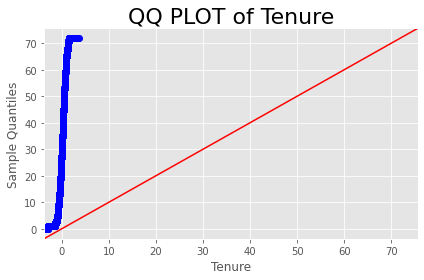

<Figure size 720x360 with 0 Axes>

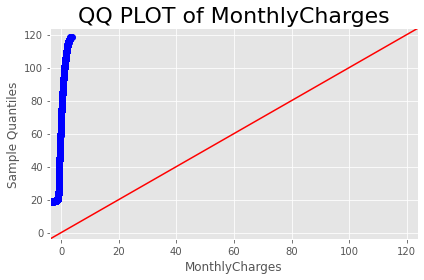

<Figure size 720x360 with 0 Axes>

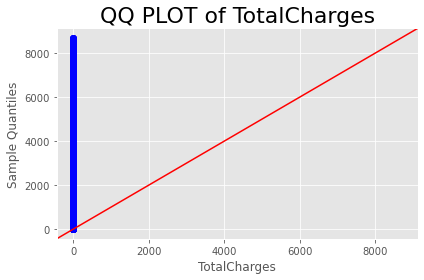

In [11]:
for col in df_cont :
    
    plt.figure(figsize = (10,5))
    
    sm.qqplot(df[col], line = '45')
    plt.xlabel(col, fontsize = 12)
    plt.title('QQ PLOT of ' + col, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

The qq plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution (ex. Normal Distribution). If it is true, then we should see the data points forming a line that’s roughly straight. However, in this datas we see that the data points (it's the blue color) are not following the red line. Therefore we can assume that it's not coming from a Normal Distribution. Therefore we're not choosing the Standard Scaler, as there are more method to choose from. Hence we are moving to next test.

Below, I'd like to check whether our datas are having many outliers or not, because if it is, we're going to choose the Robust Scaler method.

In [12]:
def outliers(df):
    Q2 = np.quantile(df, 0.50)
    Q1 = np.quantile(df, 0.25)
    Q3 = np.quantile(df, 0.75)
    
    IQR   = (Q3 - Q1) * 1.5
    lower =  Q1 - IQR
    upper =  Q3 + IQR 

    outlier = ''
    for i in range(len(df)):
        if df[i] > upper :
            outlier = outlier + str(df[i]) + ', '
        if df[i] < lower :
            outlier = outlier + str(df[i]) + ', '
    return len(outlier)

In [13]:
for col in df_cont:
    outlier = outliers(df[col])
    print('There are', outlier, 'Outliers on', col, 'Variable')

There are 0 Outliers on Tenure Variable
There are 0 Outliers on MonthlyCharges Variable
There are 0 Outliers on TotalCharges Variable


Seems there are no outliers in our datas, I'll try to visualize it below with boxplot. The boxplot are mainly used to display the distribution of data based on a five number summary : minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Therefore it can also detect the outliers.

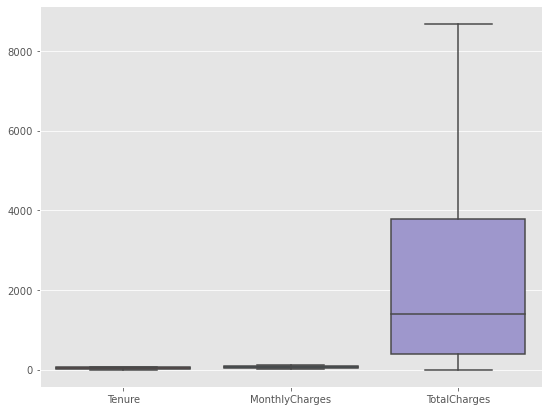

In [14]:
plt.figure(figsize = (9,7))
sns.boxplot(data=df_cont)
plt.show()

This proof that our datas does not have any outliers, so that using Robust Scaler is not necessary. Then this means that we will scale our datas using Min Max Scaler.

In [15]:
df_scaled = df.copy()

In [16]:
# using MinMax Scaler to scale data

df_scaled['Tenure'] = MinMaxScaler().fit_transform(df_scaled[['Tenure']])
df_scaled['MonthlyCharges'] = MinMaxScaler().fit_transform(df_scaled[['MonthlyCharges']])
df_scaled['TotalCharges'] = MinMaxScaler().fit_transform(df_scaled[['TotalCharges']])

In [17]:
df_scaled.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,0.013889,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.003437,0
1,5575-GNVDE,Male,No,No,No,0.472222,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.385075,0.217564,0
2,3668-QPYBK,Male,No,No,No,0.027778,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.012453,1
3,7795-CFOCW,Male,No,No,No,0.625000,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.211951,0
4,9237-HQITU,Female,No,No,No,0.027778,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.017462,1


From the data above we can see that we have successfully scaled our data. Let's try to visualize it using boxplot, and see the differences between before and after scaling.

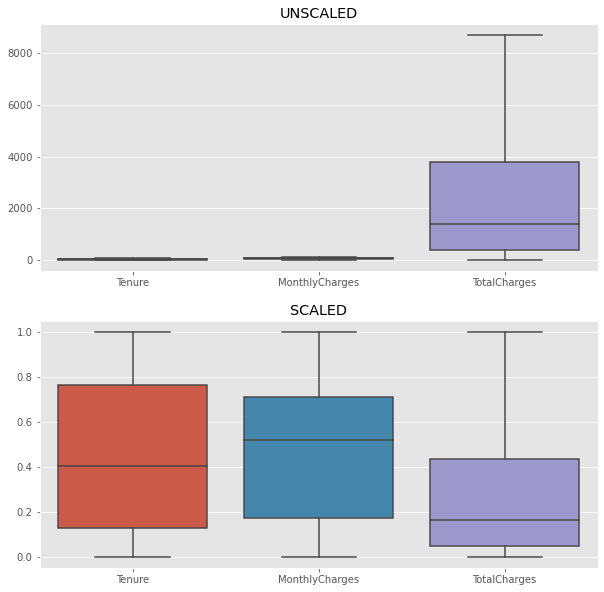

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10))

sns.boxplot(data = df_cont, ax=ax1).title.set_text('UNSCALED')
sns.boxplot(data = df_scaled.drop(columns = 'Churn'), ax=ax2).title.set_text('SCALED')

plt.show()

Now we're ready to move on to the prediction model building, but before that I'll create copy of our scaled, so that we're not getting mixed up in the process.

In [19]:
df_ready = df_scaled.copy()

I rather drop the *customerID* as it's just the same as index. 

In [20]:
df_ready = df_ready.drop('customerID', axis = 1)

I'll use `pd.get_dummies` to get our data labelled.

In [21]:
df_ready = pd.get_dummies(df_ready)

In [22]:
df_ready.head()

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [23]:
df_ready.to_csv('df_ready.csv', index = False)

Now that we've finished our scaling and labeling process, let's start building our predictive Models. I'll start by splitting our data to 80% Train and 20% test data first. But notice that I converted the dataframe to csv above, in order to pass it into the **hyperparameter sections**, so that after we got our best tuning for each of our models, then we can apply the tuned model to this notebook to continue the process. 

### MODELLING

### Splitting Train Data - 80%

From this point forward we will be focusing on building our predictive model, I'll start this by splitting our data, then fitting and re-evaluating the models by comparing each score with the hyperparameters score.

In [24]:
df_80 = df_ready.copy()

In [25]:
x = df_80.drop(columns = ['Churn'])
y = df_80['Churn'].values

In [26]:
x.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


#### FITTING MODEL

In [27]:
#Split train data 80%, test data 20%
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size = 0.8, shuffle = False)

#Model
LRG = LogisticRegression().fit(x_train, y_train)
RFC = RandomForestClassifier().fit(x_train, y_train)
KNN = KNeighborsClassifier().fit(x_train, y_train)

#### HYPERPARAMETER

Now we will set our Hyperparameter tuned model. A hyperparameter is a parameter whose value is used to control the machine learning process. Usually in most cases the models performed better by using this method. As mentioned, the tune process of Hyperparameter will be on separate notebook. Below we apply the best tuned parameters to our hyperparameter version of each models.

In [28]:
# applying model with hyperparameter
LRG_best = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10).fit(x_train, y_train)
RFC_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 4, max_depth = 10).fit(x_train, y_train)
KNN_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 18).fit(x_train, y_train)

In [29]:
# train data
LRG_score_tr = LRG.score(x_train,y_train)
RFC_score_tr = RFC.score(x_train,y_train)
KNN_score_tr = KNN.score(x_train,y_train)
LRG_best_score_tr = LRG_best.score(x_train,y_train)
RFC_best_score_tr = RFC_best.score(x_train,y_train)
KNN_best_score_tr = KNN_best.score(x_train,y_train)

In [30]:
# test data
LRG_score = LRG.score(x_test,y_test)
RFC_score = RFC.score(x_test,y_test)
KNN_score = KNN.score(x_test,y_test)
LRG_best_score = LRG_best.score(x_test,y_test)
RFC_best_score = RFC_best.score(x_test,y_test)
KNN_best_score = KNN_best.score(x_test,y_test)

In [31]:
model80_train_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                                    'Normal': [LRG_score_tr, RFC_score_tr, KNN_score_tr], 
                                    'Hyper' : [LRG_best_score_tr, RFC_best_score_tr, KNN_best_score_tr]})

In [32]:
model80_test_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                                   'Normal': [LRG_score, RFC_score, KNN_score], 
                                   'Hyper' : [LRG_best_score, RFC_best_score, KNN_best_score]})

In [33]:
pd.concat([model80_train_score, model80_test_score], keys = ['Train Score', 'Test Score'])

Model    Normal     Hyper
Train Score 0  LogRegression  0.805112  0.802449
            1   RandomForest  0.997870  0.846823
            2    KNNeighbors  0.834221  0.801207
Test Score  0  LogRegression  0.801278  0.801987
            1   RandomForest  0.800568  0.799858
            2    KNNeighbors  0.770759  0.787793

Seeing the test score result, we can see that our models indeed performed better using Hyperparameter, therefore we'll use hyperparameter model for our prediction. But before that, by comparing our Train and Test Scores we can see that maybe there are some overfitting in our data especially on Random Forest method. So I'll try to check it with ***cross validation*** before we continue to the next step.

In [34]:
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
LRG_kfold = cross_val_score(LRG_best, x_train, y_train, cv = cv, scoring = 'accuracy')
RFC_kfold = cross_val_score(RFC_best, x_train, y_train, cv = cv, scoring = 'accuracy')
KNN_kfold = cross_val_score(KNN_best, x_train, y_train, cv = cv, scoring = 'accuracy')

print(f"LRG Kfold cross-val : {LRG_kfold}")
print(f"RFC Kfold cross-val : {RFC_kfold}")
print(f"KNN Kfold cross-val : {KNN_kfold}")

LRG Kfold cross-val : [0.78546099 0.79432624 0.80141844 0.79609929 0.81527531 0.81705151
 0.8277087  0.80284192 0.77797513 0.78863233]
RFC Kfold cross-val : [0.80496454 0.82269504 0.79964539 0.79255319 0.80639432 0.81527531
 0.81882771 0.79040853 0.79396092 0.79396092]
KNN Kfold cross-val : [0.7606383  0.79964539 0.78191489 0.7677305  0.80817052 0.78152753
 0.81172291 0.79396092 0.76909414 0.77264654]


In [35]:
pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
              'Normal': [LRG_score_tr, RFC_score_tr, KNN_score_tr],
              'Kfold ': [LRG_kfold.mean(), RFC_kfold.mean(), KNN_kfold.mean()]})

,Model,Normal,Kfold
0,LogRegression,0.805112,0.800679
1,RandomForest,0.997870,0.803869
2,KNNeighbors,0.834221,0.784705


So, by using 5 times cross validation to compare our previous score with the kfold score, it seems that we can see ovefitting on our Random Forest model, while the other two are rather stable. But for now let's continue to next process, we will apply our model to predict the test data.

#### PREDICT

In [36]:
#Logistic Regression
yp_LRG = LRG_best.predict(x_test)

#Random Forest
yp_RFC = RFC_best.predict(x_test)

#KNNeighbors
yp_KNN = KNN_best.predict(x_test)

### MODEL PERFORMANCE EVALUATION

Below, we will begin evaluating our models starting from Logistic Regression, then Random Forest, and lastly the KNN model.

### Logistic Regression

In theory, Logistic Regression method uses a logistic function to frame binary output model. The output of the logistic regression will be a probability (0≤x≤1), and can be used to predict the binary 0 or 1 as the output.

In [37]:
# evaluation matrix for LogisticRegression
cm_LRG = confusion_matrix(y_test, yp_LRG)
cm_LRG

array([[923, 105],
       [174, 207]], dtype=int64)

In [38]:
labels = ['Not Churned', 'Churned']

              precision    recall  f1-score   support

 Not Churned       0.84      0.90      0.87      1028
     Churned       0.66      0.54      0.60       381

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



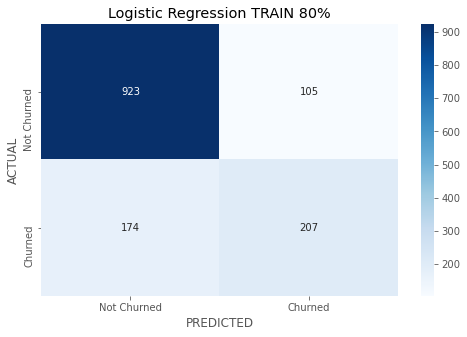

In [39]:
print(classification_report(y_test, yp_LRG, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

Acually by seeing the data from the confusion matrix above, we can see that our data is more likely unbalanced. Therefore maybe in the end after comparing our result we can try to re-balance the data using oversampling or undersampling method. For now let's just focus on building the models.

I also put the classification report into **report_LRG** so that in the summary section we can call it back and concatenate it with other reports.

In [40]:
report_LRG = pd.DataFrame(classification_report(y_test, yp_LRG, target_names= labels, output_dict=True)).T

### Random Forest Classifier

Moving on to the next model, Random forests. It's esentially are a learning method for classification, regression and other tasks that operate by constructing a multitude of Decision Trees. While Decision Tree is a tree based algorithm used to solve regression and classification problems. An inverted tree is framed which is branched off from a homogeneous probability distributed root node, to highly heterogeneous leaf nodes, for deriving the output.

In [41]:
# confusion matrix for RandomForestClassifier
cm_RFC = confusion_matrix(y_test, yp_RFC)
cm_RFC

array([[938,  90],
       [192, 189]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.83      0.91      0.87      1028
     Churned       0.68      0.50      0.57       381

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



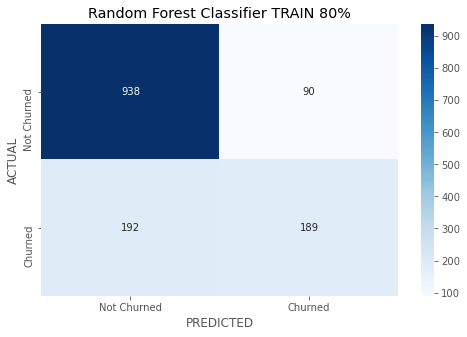

In [42]:
print(classification_report(y_test, yp_RFC, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

We've done with the Random Forest, next we will store the report into **report_RFC** and moving to last model in this 80% Train data category.

In [43]:
report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC, target_names= labels, output_dict=True)).T

### K-Nearest Neighbors

K-Nearest Neighbors is one of the most easy ML technique used. The logic behind KNN is to explore the data's nearest neighbor, assume the test datapoint to be similar to them and derive the output. In case of KNN classification, a majority voting is applied over the k nearest datapoints.

In [44]:
# confusion matrix for KNN
cm_KNN = confusion_matrix(y_test, yp_KNN)
cm_KNN

array([[886, 142],
       [157, 224]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.85      0.86      0.86      1028
     Churned       0.61      0.59      0.60       381

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



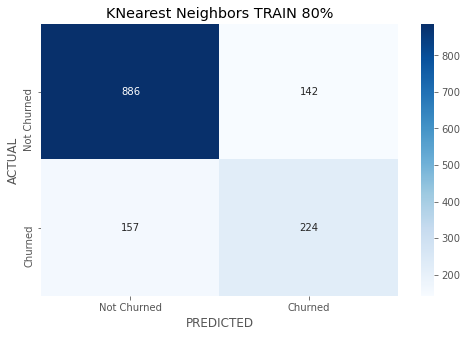

In [45]:
print(classification_report(y_test, yp_KNN, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

Allright, it seems that we've done all the modelling for our 80% Train category. Now I'll store the report in **report_KNN**. Then we move to the next category, the 90% Train data.

In [46]:
report_KNN = pd.DataFrame(classification_report(y_test, yp_KNN, target_names= labels, output_dict=True)).T

### Splitting Data - Train 90%

In general, the procedures on this category are pretty much the same as the 80% Train datas, the only difference is on this category we'll split the data into 90% Train and 10% Test data. Since the procedures are same, I would not explain the details as the explanations would also be repetitive and the same as above. 

In [47]:
df_90 = df_ready.copy()

In [48]:
x1 = df_90.drop(columns = ['Churn'])
y1 = df_90['Churn'].values

In [49]:
x1.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


#### FITTING MODEL

In [50]:
#Split Train 90%
x1_train, x1_test, y1_train, y1_test =  train_test_split(x1, y1, train_size = 0.9, shuffle = False)

#Model
LRG1 = LogisticRegression().fit(x1_train, y1_train)
RFC1 = RandomForestClassifier().fit(x1_train, y1_train)
KNN1 = KNeighborsClassifier().fit(x1_train, y1_train)

#### HYPERPARAMETER

In [51]:
LRG1_best = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 100).fit(x1_train, y1_train)
RFC1_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_depth = 10).fit(x1_train, y1_train)
KNN1_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 39).fit(x1_train, y1_train)

In [52]:
# train
LRG1_score_tr = LRG1.score(x1_train,y1_train)
RFC1_score_tr = RFC1.score(x1_train,y1_train)
KNN1_score_tr = KNN1.score(x1_train,y1_train)
LRG1_best_score_tr = LRG1_best.score(x1_train,y1_train)
RFC1_best_score_tr = RFC1_best.score(x1_train,y1_train)
KNN1_best_score_tr = KNN1_best.score(x1_train,y1_train)

In [53]:
# test
LRG1_score = LRG1.score(x1_test,y1_test)
RFC1_score = RFC1.score(x1_test,y1_test)
KNN1_score = KNN1.score(x1_test,y1_test)
LRG1_best_score = LRG1_best.score(x1_test,y1_test)
RFC1_best_score = RFC1_best.score(x1_test,y1_test)
KNN1_best_score = KNN1_best.score(x1_test,y1_test)

In [54]:
model90_train_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                                   'Normal': [LRG1_score_tr, RFC1_score_tr, KNN1_score_tr],
                                   'Hyper' : [LRG1_best_score_tr, RFC1_best_score_tr, KNN1_best_score_tr]})

In [55]:
model90_test_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                                   'Normal': [LRG1_score, RFC1_score, KNN1_score],
                                   'Hyper' : [LRG1_best_score, RFC1_best_score, KNN1_best_score]})

In [56]:
pd.concat([model90_train_score, model90_test_score], keys = ['Train Score', 'Test Score'])

Model    Normal     Hyper
Train Score 0  LogRegression  0.804828  0.808299
            1   RandomForest  0.997318  0.856422
            2    KNNeighbors  0.832755  0.803566
Test Score  0  LogRegression  0.797163  0.800000
            1   RandomForest  0.800000  0.801418
            2    KNNeighbors  0.777305  0.797163

Note that in this category, we can also see that the model are overfitting. I'll try to use cross validation once again.

In [57]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state=0)
LRG1_kfold = cross_val_score(LRG_best, x1_train, y1_train, cv = cv, scoring = 'accuracy')
RFC1_kfold = cross_val_score(RFC_best, x1_train, y1_train, cv = cv, scoring = 'accuracy')
KNN1_kfold = cross_val_score(KNN_best, x1_train, y1_train, cv = cv, scoring = 'accuracy')

print(f"LRG Kfold cross-val : {LRG1_kfold}")
print(f"RFC Kfold cross-val : {RFC1_kfold}")
print(f"KNN Kfold cross-val : {KNN1_kfold}")

LRG Kfold cross-val : [0.81230284 0.79810726 0.80520505 0.78768745 0.80110497]
RFC Kfold cross-val : [0.80047319 0.80126183 0.81309148 0.79321231 0.80189424]
KNN Kfold cross-val : [0.78943218 0.78312303 0.80047319 0.77505919 0.78926598]


In [58]:
pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
              'Normal': [LRG1_score_tr, RFC1_score_tr, KNN1_score_tr],
              'Kfold ': [LRG1_kfold.mean(), RFC1_kfold.mean(), KNN1_kfold.mean()]})

,Model,Normal,Kfold
0,LogRegression,0.804828,0.800882
1,RandomForest,0.997318,0.801987
2,KNNeighbors,0.832755,0.787471


Now, we continue to our model prediction and model evaluation.

#### PREDICT

In [59]:
#Logistic Regression
yp_LRG1 = LRG1_best.predict(x1_test)

#Random Forest
yp_RFC1 = RFC1_best.predict(x1_test)

#KNNeighbors
yp_KNN1 = KNN1_best.predict(x1_test)

### MODEL PERFORMANCE EVALUATION

### Logistic Regression 

In [60]:
# confusion matrix for LogisticRegression
cm_LRG1 = confusion_matrix(y1_test, yp_LRG1)
cm_LRG1

array([[461,  49],
       [ 92, 103]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.83      0.90      0.87       510
     Churned       0.68      0.53      0.59       195

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.73       705
weighted avg       0.79      0.80      0.79       705



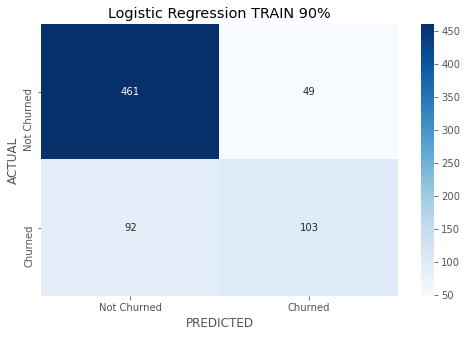

In [61]:
print(classification_report(y1_test, yp_LRG1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [62]:
report_LRG1 = pd.DataFrame(classification_report(y1_test, yp_LRG1, target_names= labels, output_dict=True)).T

### Random Forest Classifier

In [63]:
# confusion matrix for RandomForestClassifier
cm_RFC1 = confusion_matrix(y1_test, yp_RFC1)
cm_RFC1

array([[467,  43],
       [ 97,  98]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.83      0.92      0.87       510
     Churned       0.70      0.50      0.58       195

    accuracy                           0.80       705
   macro avg       0.76      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



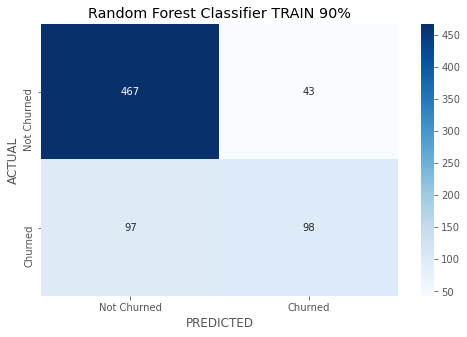

In [64]:
print(classification_report(y1_test, yp_RFC1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [65]:
report_RFC1 = pd.DataFrame(classification_report(y1_test, yp_RFC1, target_names= labels, output_dict=True)).T

### K-Nearest Neighbors

In [66]:
# confusion matrix for KNN
cm_KNN1 = confusion_matrix(y1_test, yp_KNN1)
cm_KNN1

array([[446,  64],
       [ 79, 116]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.85      0.87      0.86       510
     Churned       0.64      0.59      0.62       195

    accuracy                           0.80       705
   macro avg       0.75      0.73      0.74       705
weighted avg       0.79      0.80      0.79       705



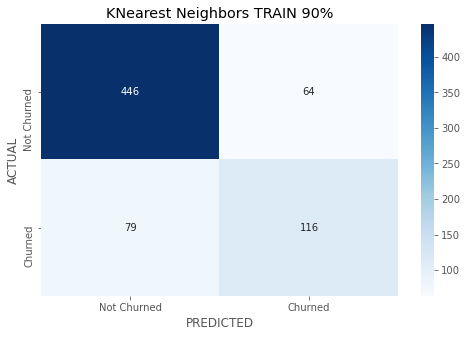

In [67]:
print(classification_report(y1_test, yp_KNN1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [68]:
report_KNN1 = pd.DataFrame(classification_report(y1_test, yp_KNN1, target_names= labels, output_dict=True)).T

### MODEL SUMMARY

Now, we will summarize our findings. But before that, we must answer the question I mentioned before. 

What is a Confusion Matrix ? What does it implies ?

A confusion matrix is simply a table that is often used to describe the performance of a classification model on a set of test data. 

Let's now define the most basic terms in this matrix :

- True Positives (TP): Cases in which are predicted as *positives* and in reality are also *positives*.


- True Negatives (TN): Cases in which are predicted as *negatives* and in reality are also *negatives*.


- False Positives (FP): Cases in which are predicted as *positives*, but in reality are *negatives*.


- False Negatives (FN): Cases in which are predicted as *negatives*, but in reality are *positives*.

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

- Accuracy : Overall, how often is the classifier correct?


- Recall : When it's actually true, how often does it predict as true ?


- Precision : When it predicts true, how often is it correct ?

### Logistic Regression Comparison

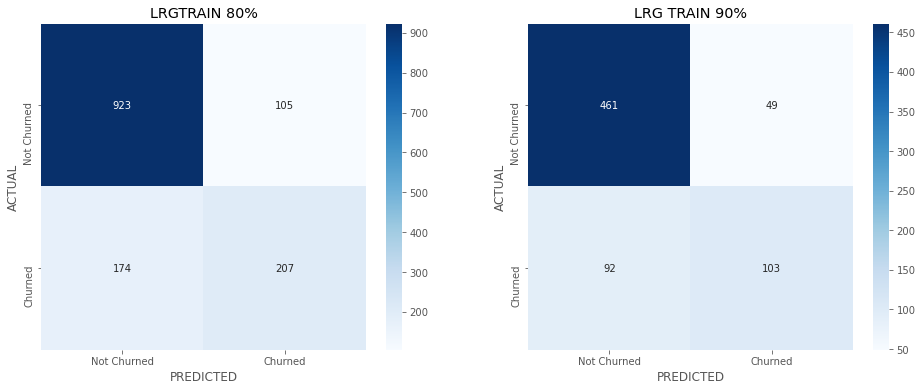

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax1, cmap = 'Blues')
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('LRGTRAIN 80%'), ax2.set_title('LRG TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [70]:
pd.concat([report_LRG, report_LRG1], keys = ['LRG TRAIN 80%', 'LRG TRAIN 90%'])

precision    recall  f1-score      support
LRG TRAIN 80% Not Churned    0.841386  0.897860  0.868706  1028.000000
              Churned        0.663462  0.543307  0.597403   381.000000
              accuracy       0.801987  0.801987  0.801987     0.801987
              macro avg      0.752424  0.720584  0.733054  1409.000000
              weighted avg   0.793274  0.801987  0.795344  1409.000000
LRG TRAIN 90% Not Churned    0.833635  0.903922  0.867357   510.000000
              Churned        0.677632  0.528205  0.593660   195.000000
              accuracy       0.800000  0.800000  0.800000     0.800000
              macro avg      0.755633  0.716063  0.730508   705.000000
              weighted avg   0.790485  0.800000  0.791653   705.000000

In [71]:
# Accuracy, Precision, Recall, F1 Score

# accuracy
LRG_acc = accuracy_score(y_test, yp_LRG)
LRG1_acc = accuracy_score(y1_test, yp_LRG1)

# precision
LRG_prec = precision_score(y_test,  yp_LRG, pos_label = 1)
LRG1_prec = precision_score(y1_test, yp_LRG1, pos_label = 1)

# recall
LRG_rec = recall_score(y_test, yp_LRG, pos_label = 1)
LRG1_rec = recall_score(y1_test, yp_LRG1, pos_label = 1)

# f1 score
LRG_fsc = f1_score(y_test, yp_LRG, pos_label = 1)
LRG1_fsc = f1_score(y1_test, yp_LRG1, pos_label = 1)

In [72]:
LRG_score_comp = pd.DataFrame({'LRG 80' : [LRG_acc, LRG_prec, LRG_rec, LRG_fsc], 
                               'LRG 90' : [LRG1_acc, LRG1_prec, LRG1_rec, LRG1_fsc]}, 
                              index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
LRG_score_comp

,LRG 80,LRG 90
ACCURACY,0.801987,0.800000
PRECISION,0.663462,0.677632
RECALL,0.543307,0.528205
F1 SCORE,0.597403,0.593660


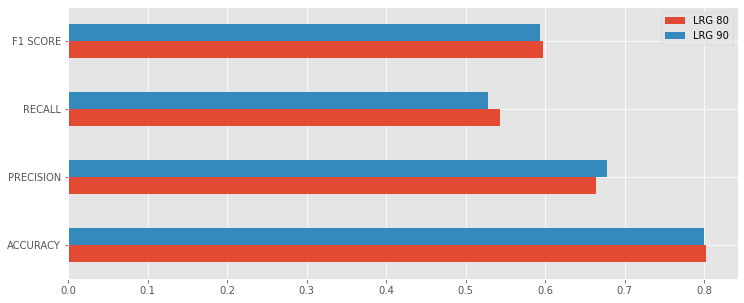

In [73]:
LRG_score_comp.plot(kind = 'barh', figsize = (12,5))

### Random Forest Comparison

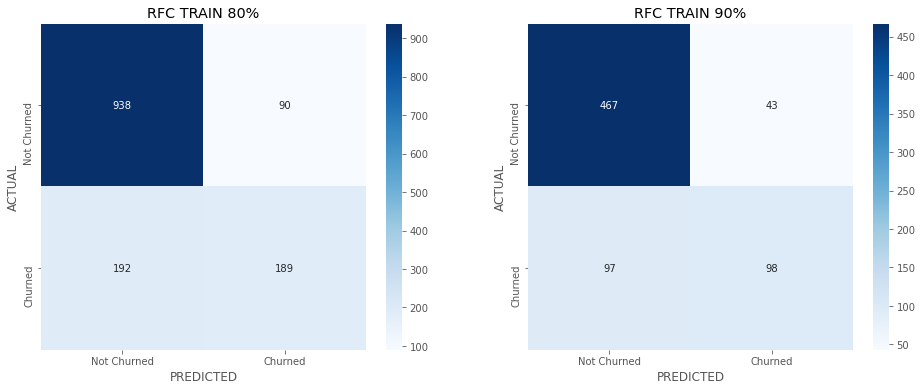

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax1, cmap = 'Blues')
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('RFC TRAIN 80%'), ax2.set_title('RFC TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [75]:
pd.concat([report_RFC, report_RFC1], keys = ['RFC TRAIN 80%', 'RFC TRAIN 90%'])

precision    recall  f1-score      support
RFC TRAIN 80% Not Churned    0.830088  0.912451  0.869323  1028.000000
              Churned        0.677419  0.496063  0.572727   381.000000
              accuracy       0.799858  0.799858  0.799858     0.799858
              macro avg      0.753754  0.704257  0.721025  1409.000000
              weighted avg   0.788806  0.799858  0.789122  1409.000000
RFC TRAIN 90% Not Churned    0.828014  0.915686  0.869646   510.000000
              Churned        0.695035  0.502564  0.583333   195.000000
              accuracy       0.801418  0.801418  0.801418     0.801418
              macro avg      0.761525  0.709125  0.726490   705.000000
              weighted avg   0.791233  0.801418  0.790453   705.000000

In [76]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
RFC_acc = accuracy_score(y_test, yp_RFC)
RFC1_acc = accuracy_score(y1_test, yp_RFC1)

# precision
RFC_prec = precision_score(y_test, yp_RFC, pos_label = 1)
RFC1_prec = precision_score(y1_test, yp_RFC1, pos_label = 1)

# recall
RFC_rec = recall_score(y_test, yp_RFC, pos_label = 1)
RFC1_rec = recall_score(y1_test, yp_RFC1, pos_label = 1)

# f1 score
RFC_fsc = f1_score(y_test, yp_RFC, pos_label = 1)
RFC1_fsc = f1_score(y1_test, yp_RFC1, pos_label = 1)

In [77]:
RFC_score_comp = pd.DataFrame({'RFC 80' : [RFC_acc, RFC_prec, RFC_rec, RFC_fsc], 
                               'RFC 90' : [RFC1_acc, RFC1_prec, RFC1_rec, RFC1_fsc]}, 
                              index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
RFC_score_comp

,RFC 80,RFC 90
ACCURACY,0.799858,0.801418
PRECISION,0.677419,0.695035
RECALL,0.496063,0.502564
F1 SCORE,0.572727,0.583333


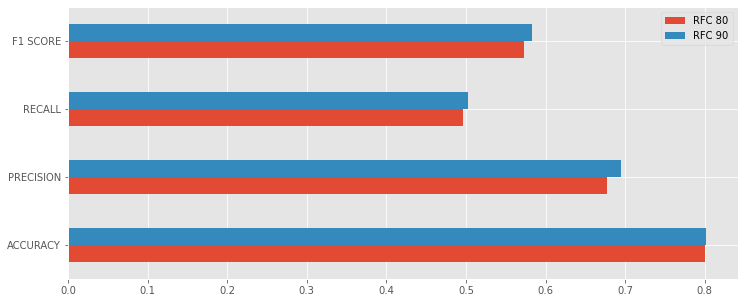

In [78]:
RFC_score_comp.plot(kind = 'barh', figsize = (12,5))

### K-Nearest Neighbors Comparison

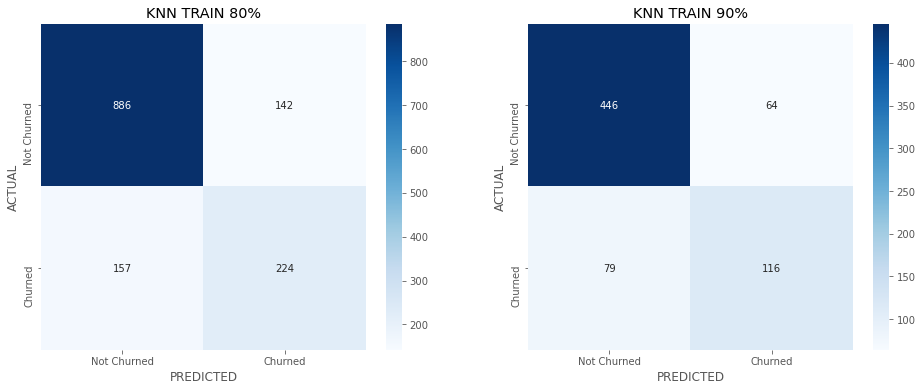

In [79]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax1, cmap='Blues')
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('KNN TRAIN 80%'), ax2.set_title('KNN TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [80]:
pd.concat([report_KNN, report_KNN1], keys = ['KNN TRAIN 80%', 'KNN TRAIN 90%'])

precision    recall  f1-score      support
KNN TRAIN 80% Not Churned    0.849473  0.861868  0.855625  1028.000000
              Churned        0.612022  0.587927  0.599732   381.000000
              accuracy       0.787793  0.787793  0.787793     0.787793
              macro avg      0.730747  0.724897  0.727679  1409.000000
              weighted avg   0.785265  0.787793  0.786431  1409.000000
KNN TRAIN 90% Not Churned    0.849524  0.874510  0.861836   510.000000
              Churned        0.644444  0.594872  0.618667   195.000000
              accuracy       0.797163  0.797163  0.797163     0.797163
              macro avg      0.746984  0.734691  0.740251   705.000000
              weighted avg   0.792800  0.797163  0.794576   705.000000

In [81]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
KNN_acc = accuracy_score(y_test, yp_KNN)
KNN1_acc = accuracy_score(y1_test, yp_KNN1)

# precision
KNN_prec = precision_score(y_test, yp_KNN, pos_label = 1)
KNN1_prec = precision_score(y1_test, yp_KNN1, pos_label = 1)

# recall
KNN_rec = recall_score(y_test, yp_KNN, pos_label = 1)
KNN1_rec = recall_score(y1_test, yp_KNN1, pos_label = 1)

# f1 score
KNN_fsc = f1_score(y_test, yp_KNN, pos_label = 1)
KNN1_fsc = f1_score(y1_test, yp_KNN1, pos_label = 1)

In [82]:
KNN_score_comp = pd.DataFrame({'KNN 80' : [KNN_acc, KNN_prec, KNN_rec, KNN_fsc], 
                               'KNN 90' : [KNN1_acc, KNN1_prec, KNN1_rec, KNN1_fsc]}, 
                              index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
KNN_score_comp

,KNN 80,KNN 90
ACCURACY,0.787793,0.797163
PRECISION,0.612022,0.644444
RECALL,0.587927,0.594872
F1 SCORE,0.599732,0.618667


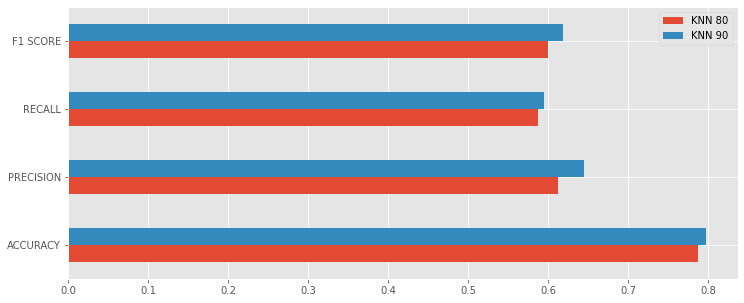

In [83]:
KNN_score_comp.plot(kind = 'barh', figsize = (12,5))

### CONCLUSION FOR MODEL SUMMARY

Now that we've summarized all the models we need to predict, therefore in this next step, we will seek for our best model by comparing all the result from each models in each data train splitting (80% and 90%).

As the F1 score conveys the balance between the precision and the recall, thus rather than accuracy, we would pick the models with the highest F1 score from each of the categories.

- For Logistic Regression model, we will pick the 80% category. 
- For Random Forest Classifier model, we will pick the 90% category.
- For K Nearest Neighbors method, we will pick the 90% category.

In [84]:
model_best = pd.concat([report_LRG, report_RFC1, report_KNN1], keys = ['LRG 80', 'RFC 90', 'KNN 90'])

In [85]:
model_best

precision    recall  f1-score      support
LRG 80 Not Churned    0.841386  0.897860  0.868706  1028.000000
       Churned        0.663462  0.543307  0.597403   381.000000
       accuracy       0.801987  0.801987  0.801987     0.801987
       macro avg      0.752424  0.720584  0.733054  1409.000000
       weighted avg   0.793274  0.801987  0.795344  1409.000000
RFC 90 Not Churned    0.828014  0.915686  0.869646   510.000000
       Churned        0.695035  0.502564  0.583333   195.000000
       accuracy       0.801418  0.801418  0.801418     0.801418
       macro avg      0.761525  0.709125  0.726490   705.000000
       weighted avg   0.791233  0.801418  0.790453   705.000000
KNN 90 Not Churned    0.849524  0.874510  0.861836   510.000000
       Churned        0.644444  0.594872  0.618667   195.000000
       accuracy       0.797163  0.797163  0.797163     0.797163
       macro avg      0.746984  0.734691  0.740251   705.000000
       weighted avg   0.792800  0.797163  0.794576   705.000000

In [86]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
LRG_acc = accuracy_score(y_test, yp_LRG)
RFC1_acc = accuracy_score(y1_test, yp_RFC1)
KNN_acc = accuracy_score(y1_test, yp_KNN1)

# precision
LRG_prec = precision_score(y_test, yp_LRG, pos_label = 1)
RFC1_prec = precision_score(y1_test, yp_RFC1, pos_label = 1)
KNN_prec = precision_score(y1_test, yp_KNN1, pos_label = 1)

# recall
LRG_rec = recall_score(y_test, yp_LRG, pos_label = 1)
RFC1_rec = recall_score(y1_test, yp_RFC1, pos_label = 1)
KNN_rec = recall_score(y1_test, yp_KNN1, pos_label = 1)

# f1 score
LRG_fsc = f1_score(y_test, yp_LRG, pos_label = 1)
RFC1_fsc = f1_score(y1_test, yp_RFC1, pos_label = 1)
KNN_fsc = f1_score(y1_test, yp_KNN1, pos_label = 1)

In [87]:
final_score_comp = pd.DataFrame({'LRG 80' : [LRG_acc, LRG_prec, LRG_rec, LRG_fsc],
                                 'RFC 90' : [RFC1_acc, RFC1_prec, RFC1_rec, RFC1_fsc], 
                                 'KNN 80' : [KNN1_acc, KNN1_prec, KNN1_rec, KNN1_fsc]}, 
                                index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
final_score_comp

,LRG 80,RFC 90,KNN 80
ACCURACY,0.801987,0.801418,0.797163
PRECISION,0.663462,0.695035,0.644444
RECALL,0.543307,0.502564,0.594872
F1 SCORE,0.597403,0.583333,0.618667


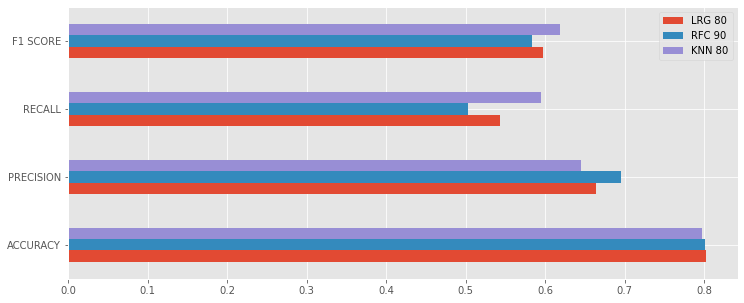

In [88]:
final_score_comp.plot(kind = 'barh', figsize = (12,5))

Finally we've finished this part, now we've got our three best models for our case. But out of all models, I think the best is using **K-Nearest Neighbors** as it is most stable. As in this case we need to predict the Churned customer, so it would be best if we choose the models with a high **Recall** apart from a high **Accuracy** and **Precision**. So to summarize : This model have an accuracy of 80%, correctly predict 64% of its total predictions on the churned customer and 84% on not churned customers. This model also having recall of 59% on the churned customers, and 87% on not churned customers. I can't say that this is a good model, but this is the best out of three.

But note that in this part, we are using all features for these models. In the next section, we will use these three models to predict but using **Feature Selection** to select what features best for our models.

              precision    recall  f1-score   support

 Not Churned       0.85      0.87      0.86       510
     Churned       0.64      0.59      0.62       195

    accuracy                           0.80       705
   macro avg       0.75      0.73      0.74       705
weighted avg       0.79      0.80      0.79       705



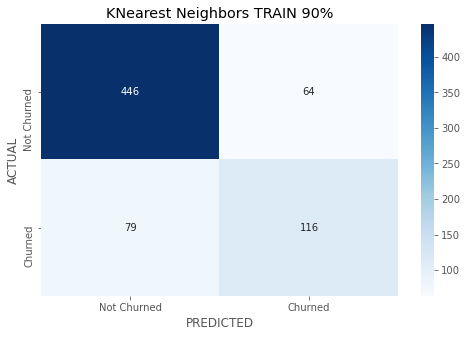

In [89]:
print(classification_report(y1_test, yp_KNN1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()